In [19]:
# Import library yang dibutuhkan
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score

# Load dataset
df = pd.read_csv('dataset.csv')
df = df.dropna()

# Split dataset menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(df['Title'], df['label'], test_size=0.4, random_state=42)

# Ekstraksi fitur menggunakan CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Training model menggunakan algoritma Naive Bayes
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Prediksi kategori data testing
y_pred = clf.predict(X_test)

# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted F1 score untuk multiclass classification
recall = recall_score(y_test, y_pred, average='weighted')  # Weighted recall untuk multiclass classification
print('Akurasi model: {:.2f}%'.format(accuracy * 100))
print('Weighted F1 Score: {:.2f}'.format(f1))
print('Weighted Recall: {:.2f}'.format(recall))

Akurasi model: 84.62%
Weighted F1 Score: 0.78
Weighted Recall: 0.85


([0, 1, 2, 3],
 [Text(0, 0, 'Teknologi'),
  Text(1, 0, 'Humaniora'),
  Text(2, 0, 'Pertanian'),
  Text(3, 0, 'Kesehatan')])

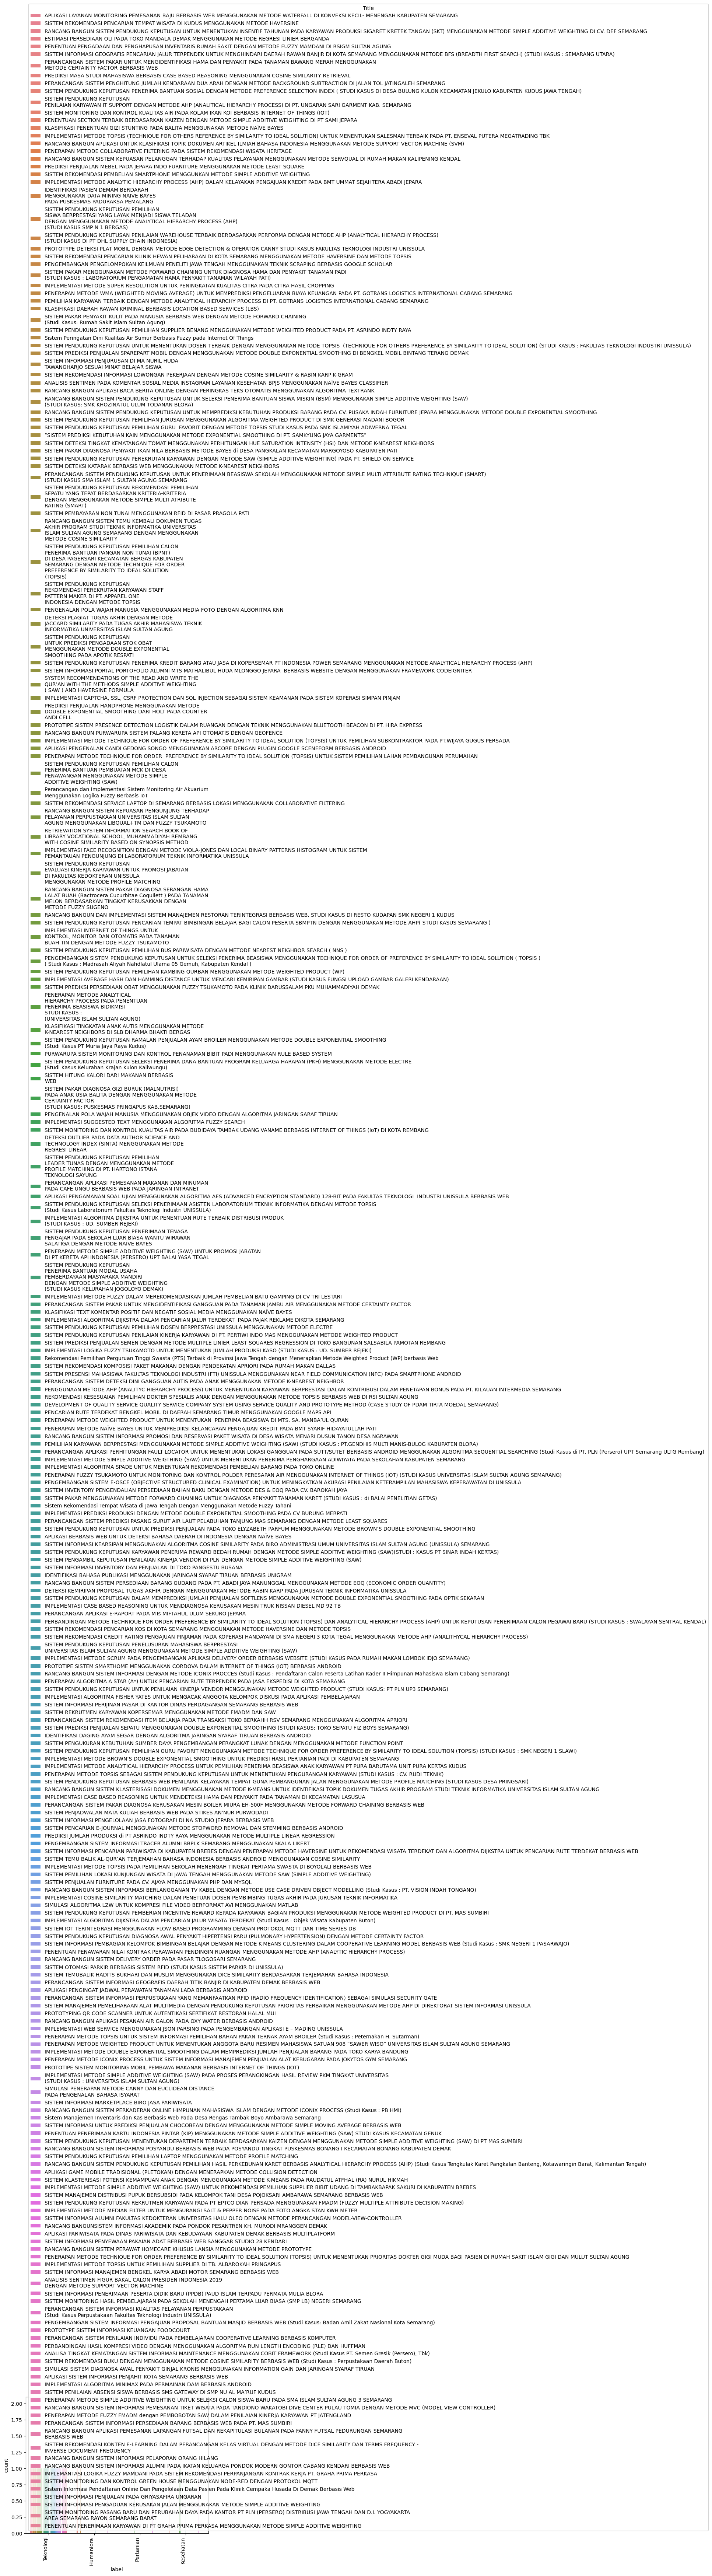

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df,x='label',hue='Title')
plt.xticks(rotation=90, ha='right')

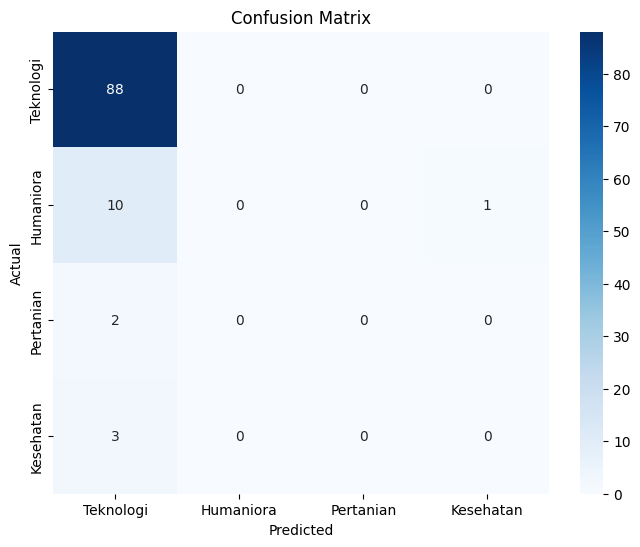

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Fungsi untuk menampilkan confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Visualisasi confusion matrix
plot_confusion_matrix(y_test, y_pred, labels=df['label'].unique())


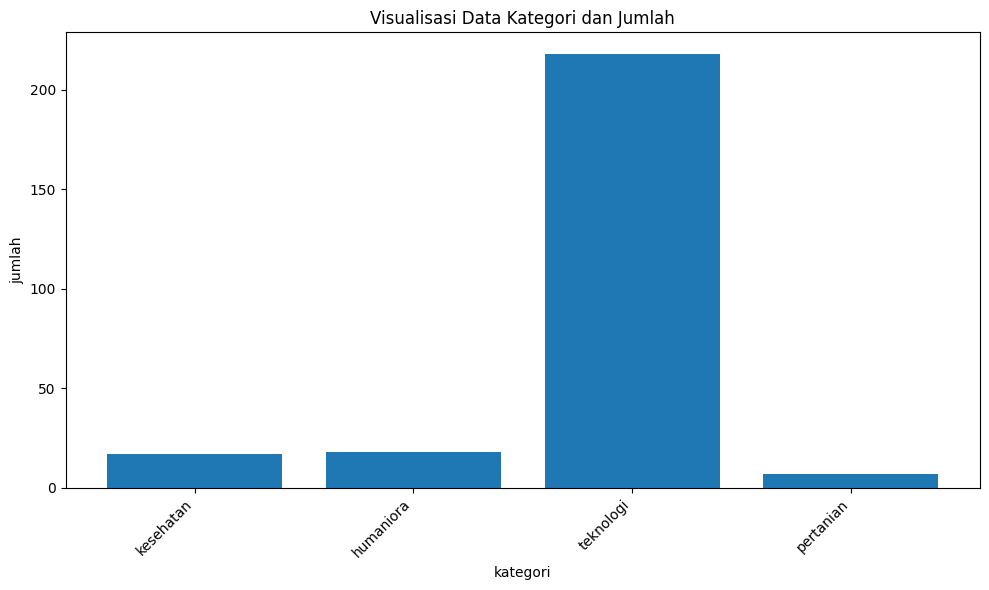

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data dari file Excel
df = pd.read_excel('data.xlsx')

# Konversi nilai dalam kolom 'kategori' ke string
df['kategori'] = df['kategori'].astype(str)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['kategori'], df['jumlah'])
plt.xlabel('kategori')
plt.ylabel('jumlah')
plt.title('Visualisasi Data Kategori dan Jumlah')
plt.xticks(rotation=45, ha='right')  # Rotasi label x-axis agar legible
plt.tight_layout()

# Tampilkan plot
plt.show()
